In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0-dev20200315
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
pandas 1.0.3
sklearn 0.22.2.post1
tensorflow 2.2.0-dev20200315
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:

from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=7) # test_size=0.25(默认)，可以通过                                   
                                                # 这个改变比例
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)
print(x_train.shape[1:])

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)
(8,)


In [4]:
# 归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [5]:
# learning rate:[1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]  只进行lr的超参数搜索:就是寻找最合适的 
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.SGD(lr)
    model.summary()
    model.compile(loss="mean_squared_error", optimizer= optimizer)
    callbacks = [keras.callbacks.EarlyStopping(patience=15, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                   validation_data = (x_valid_scaled, y_valid),
                   epochs=100,
                   callbacks = callbacks)
    histories.append(history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, ex

Epoch 56/100
363/363 [==============================] - 0s 843us/step - loss: 0.5970 - val_loss: 0.6445
Epoch 57/100
363/363 [==============================] - 0s 843us/step - loss: 0.5946 - val_loss: 0.6416
Epoch 58/100
363/363 [==============================] - 0s 824us/step - loss: 0.5922 - val_loss: 0.6388
Epoch 59/100
363/363 [==============================] - 0s 843us/step - loss: 0.5893 - val_loss: 0.6361
Epoch 60/100
363/363 [==============================] - 0s 857us/step - loss: 0.5868 - val_loss: 0.6334
Epoch 61/100
363/363 [==============================] - 0s 871us/step - loss: 0.5845 - val_loss: 0.6308
Epoch 62/100
363/363 [==============================] - 0s 865us/step - loss: 0.5820 - val_loss: 0.6282
Epoch 63/100
363/363 [==============================] - 0s 860us/step - loss: 0.5797 - val_loss: 0.6256
Epoch 64/100
363/363 [==============================] - 0s 868us/step - loss: 0.5773 - val_loss: 0.6232
Epoch 65/100
363/363 [==============================] - 0s 838us

Epoch 11/100
363/363 [==============================] - 0s 882us/step - loss: 0.6336 - val_loss: 0.6678
Epoch 12/100
363/363 [==============================] - 0s 849us/step - loss: 0.6234 - val_loss: 0.6581
Epoch 13/100
363/363 [==============================] - 0s 832us/step - loss: 0.6140 - val_loss: 0.6493
Epoch 14/100
363/363 [==============================] - 0s 827us/step - loss: 0.6058 - val_loss: 0.6413
Epoch 15/100
363/363 [==============================] - 0s 824us/step - loss: 0.5978 - val_loss: 0.6338
Epoch 16/100
363/363 [==============================] - 0s 819us/step - loss: 0.5907 - val_loss: 0.6269
Epoch 17/100
363/363 [==============================] - 0s 863us/step - loss: 0.5839 - val_loss: 0.6204
Epoch 18/100
363/363 [==============================] - 0s 868us/step - loss: 0.5778 - val_loss: 0.6142
Epoch 19/100
363/363 [==============================] - 0s 882us/step - loss: 0.5719 - val_loss: 0.6083
Epoch 20/100
363/363 [==============================] - 0s 874us

Epoch 90/100
363/363 [==============================] - 0s 860us/step - loss: 0.4474 - val_loss: 0.4764
Epoch 91/100
363/363 [==============================] - 0s 876us/step - loss: 0.4467 - val_loss: 0.4754
Epoch 92/100
363/363 [==============================] - 0s 857us/step - loss: 0.4460 - val_loss: 0.4747
Epoch 93/100
363/363 [==============================] - 0s 838us/step - loss: 0.4454 - val_loss: 0.4741
Epoch 94/100
363/363 [==============================] - 0s 846us/step - loss: 0.4449 - val_loss: 0.4733
Epoch 95/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4442 - val_loss: 0.4726
Epoch 96/100
363/363 [==============================] - 0s 843us/step - loss: 0.4437 - val_loss: 0.4719
Epoch 97/100
363/363 [==============================] - 0s 846us/step - loss: 0.4428 - val_loss: 0.4712
Epoch 98/100
363/363 [==============================] - 0s 852us/step - loss: 0.4423 - val_loss: 0.4705
Epoch 99/100
363/363 [==============================] - 0s 846us/s

Epoch 45/100
363/363 [==============================] - 0s 824us/step - loss: 0.4111 - val_loss: 0.4388
Epoch 46/100
363/363 [==============================] - 0s 794us/step - loss: 0.4099 - val_loss: 0.4362
Epoch 47/100
363/363 [==============================] - 0s 865us/step - loss: 0.4084 - val_loss: 0.4334
Epoch 48/100
363/363 [==============================] - 0s 791us/step - loss: 0.4077 - val_loss: 0.4347
Epoch 49/100
363/363 [==============================] - 0s 783us/step - loss: 0.4062 - val_loss: 0.4305
Epoch 50/100
363/363 [==============================] - 0s 788us/step - loss: 0.4053 - val_loss: 0.4293
Epoch 51/100
363/363 [==============================] - 0s 854us/step - loss: 0.4045 - val_loss: 0.4310
Epoch 52/100
363/363 [==============================] - 0s 800us/step - loss: 0.4032 - val_loss: 0.4301
Epoch 53/100
363/363 [==============================] - 0s 786us/step - loss: 0.4026 - val_loss: 0.4269
Epoch 54/100
363/363 [==============================] - 0s 849us

Epoch 6/100
363/363 [==============================] - 0s 860us/step - loss: 0.4695 - val_loss: 0.4890
Epoch 7/100
363/363 [==============================] - 0s 876us/step - loss: 0.4572 - val_loss: 0.4793
Epoch 8/100
363/363 [==============================] - 0s 876us/step - loss: 0.4452 - val_loss: 0.4702
Epoch 9/100
363/363 [==============================] - 0s 879us/step - loss: 0.4418 - val_loss: 0.4642
Epoch 10/100
363/363 [==============================] - 0s 893us/step - loss: 0.4387 - val_loss: 0.4616
Epoch 11/100
363/363 [==============================] - 0s 882us/step - loss: 0.4289 - val_loss: 0.4515
Epoch 12/100
363/363 [==============================] - 0s 874us/step - loss: 0.4216 - val_loss: 0.4446
Epoch 13/100
363/363 [==============================] - 0s 871us/step - loss: 0.4175 - val_loss: 0.4408
Epoch 14/100
363/363 [==============================] - 0s 871us/step - loss: 0.4136 - val_loss: 0.4357
Epoch 15/100
363/363 [==============================] - 0s 871us/ste

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
363/363 [==============================] - 0s 1ms/step - loss: 1.3199 - val_loss: 1.6284
Epoch 2/100
363/363 [==============================] - 0s 865us/step - loss: 0.4954 - val_loss: 0.4510
Epoch 3/100
363/363 [==============================] - 0s 843us/step - loss: 0.4022 - val_loss: 0.4018
Epoch 4/100
363/363 [==============================] - 0s 835us/step - loss: 0.3838 - val_loss: 0.3924
Epoch 5/100
363/363 [==============================] - 0s 865us/step - loss: 0.3775 - val_loss: 0.3791
Epoch 6/100
363/363 [==============================] - 0s 860us/step - loss: 0.3684 - val_loss: 0.3760
Epoch 7/100
363/363 [==============================] - 0s 868us/step - loss: 0.3646 - val_

D:\Tools\Anaconda\Anaconda3\envs\py36_tensorflow2.0_gpu\lib\site-packages\tensorflow\python\keras\callbacks.py:1472: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


363/363 [==============================] - 0s 876us/step - loss: nan - val_loss: nan
Epoch 3/100
363/363 [==============================] - 0s 876us/step - loss: nan - val_loss: nan
Epoch 4/100
363/363 [==============================] - 0s 871us/step - loss: nan - val_loss: nan
Epoch 5/100
363/363 [==============================] - 0s 857us/step - loss: nan - val_loss: nan
Epoch 6/100
363/363 [==============================] - 0s 893us/step - loss: nan - val_loss: nan
Epoch 7/100
363/363 [==============================] - 0s 879us/step - loss: nan - val_loss: nan
Epoch 8/100
363/363 [==============================] - 0s 849us/step - loss: nan - val_loss: nan
Epoch 9/100
363/363 [==============================] - 0s 833us/step - loss: nan - val_loss: nan
Epoch 10/100
363/363 [==============================] - 0s 863us/step - loss: nan - val_loss: nan
Epoch 11/100
363/363 [==============================] - 0s 876us/step - loss: nan - val_loss: nan
Epoch 12/100
363/363 [==================

learning rate 0.0001


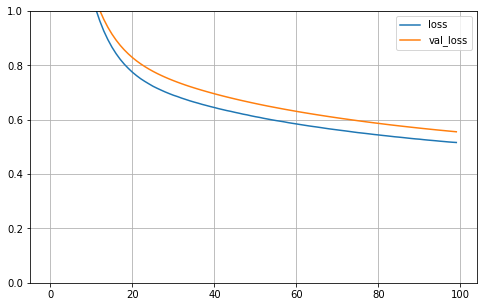

learning rate 0.0003


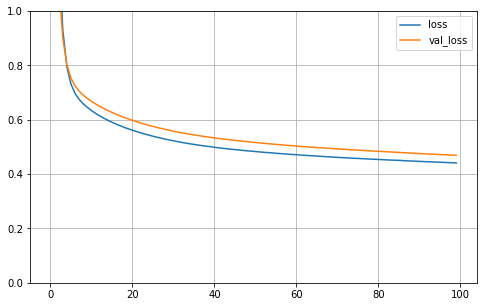

learning rate 0.001


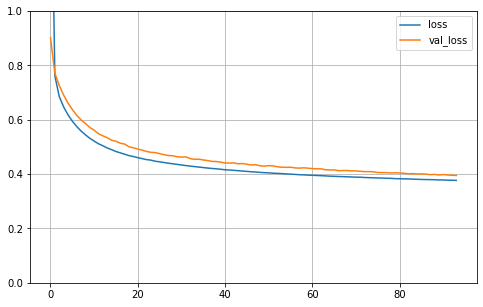

learning rate 0.003


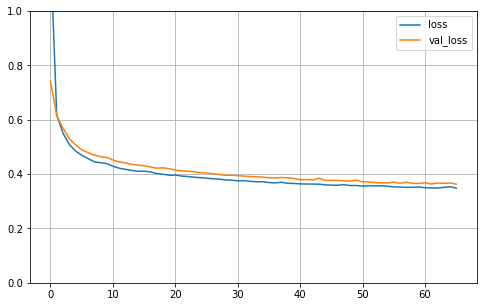

learning rate 0.01


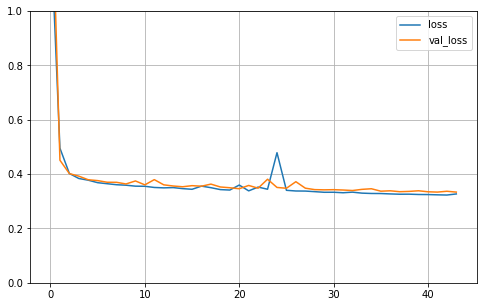

learning rate 0.03


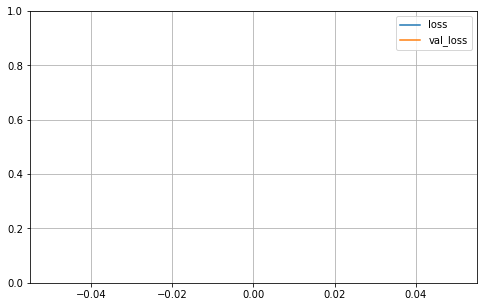

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
for lr,history in zip(learning_rates,histories):
    print('learning rate', lr)
    plot_learning_curves(history)